In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [2]:
vertical_filter = [[-1, -2, -1], [0,0,0], [1,2,1]]

In [4]:
horizontal_filter = [[-1,0,1], [-2,0,2], [-1,0,1]]

In [5]:
img = plt.imread('pinwheel.jpg')

In [6]:
n,m,d = img.shape

In [7]:
edges_img = img.copy()

In [8]:
#loop over all pixels in the image
for row in range(3, n-2):
    for col in range(3, m-2):
        
        #create little local 3x3 box
        local_pixels = img[row-1:row+2, col-1:col+2, 0]
        
        #apply the vertical filter
        vertical_transformed_pixels = vertical_filter*local_pixels
        #remap the vertical score
        vertical_score = vertical_transformed_pixels.sum()/4
        
        #apply the horizontal filter
        horizontal_transformed_pixels = horizontal_filter*local_pixels
        #remap the horizontal score
        horizontal_score = horizontal_transformed_pixels.sum()/4
        
        #combine the horizontal and vertical scores into a total edge score
        edge_score = (vertical_score**2 + horizontal_score**2)**.5
        
        #insert this edge score into the edges image
        edges_img[row, col] = [edge_score]*3

In [9]:
#remap the values in the 0-1 range in case they went out of bounds
edges_img = edges_img/edges_img.max()

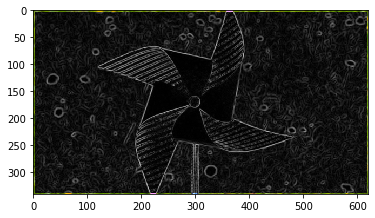

In [10]:
plt.imshow(edges_img)

In [13]:
def get_edges_of_img(img):
    n,m,d = img.shape
    edges_img = img.copy()
    #loop over all pixels in the image
    for row in range(3, n-2):
        for col in range(3, m-2):

            #create little local 3x3 box
            local_pixels = img[row-1:row+2, col-1:col+2, 0]

            #apply the vertical filter
            vertical_transformed_pixels = vertical_filter*local_pixels
            #remap the vertical score
            vertical_score = vertical_transformed_pixels.sum()/4

            #apply the horizontal filter
            horizontal_transformed_pixels = horizontal_filter*local_pixels
            #remap the horizontal score
            horizontal_score = horizontal_transformed_pixels.sum()/4

            #combine the horizontal and vertical scores into a total edge score
            edge_score = (vertical_score**2 + horizontal_score**2)**.5

            #insert this edge score into the edges image
            edges_img[row, col] = [edge_score]*3
    edges_img = edges_img/edges_img.max()
    return edges_img

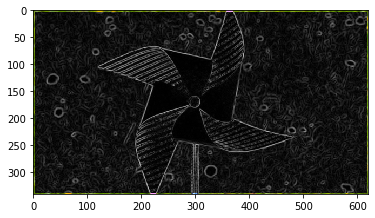

In [14]:
temp = get_edges_of_img(img)
plt.imshow(temp)

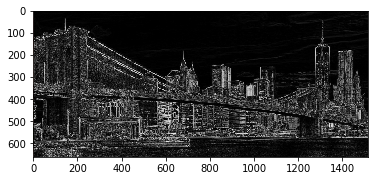

In [15]:
img = plt.imread('bridge.png')
temp = get_edges_of_img(img)
plt.imshow(temp)